In [4]:
%cd ../lib

/spoolA/petrov/research/uproot/lib


In [27]:
%load_ext autoreload
%autoreload 2

In [156]:
import numpy as np
import uproot
import uproot_methods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from glob import glob
import iminuit
import probfit as pf
import mplhep as hep

def my_style(title='', xtitle='', ytitle='', gridstyle=':'):
    plt.grid(linestyle=gridstyle)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='talk', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
jtplot.style(theme='grade3', context='paper', ticks=True, grid=True, gridlines='--', figsize=(13, 9), fscale=2)
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans', 'sans-serif']

/home/petrov/.local/lib/python3.7/site-packages/mplhep/__init__.py:48: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = fm.createFontList(font_files)


In [5]:
from lib import PhotonEff

In [6]:
p = PhotonEff()

In [60]:
g = dict()
for y in ['11', '12', '17', '19']:
    g[y] = glob(f'/spoolA/petrov/research/outputs/mc{y}/trees/*.root')
    g[y].extend(glob(f'/spoolA/petrov/research/outputs/mc{y}_uniform/trees/*.root'))

In [61]:
p = dict()
for y in g:
    p[y] = PhotonEff()
    p[y].open(*g[y])
    p[y].get_histos();
    p[y].fit_histos();

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [98]:
p['19'].get_names()

Index(['537.5_70914', '550.1_70029', '550_70260', '562.5_71178', '575_71544',
       '587.5_71908', '600_72268', '612.5_72545', '612.5_84504', '625_72787',
       '637.5_73035', '641_82925', '650_73374', '662.5_73636', '675_73926',
       '687.5_74169', '700_74366', '712.5_74528', '725_74704', '737.5_74974',
       '750_75459', '762_75730', '775_76033', '787.5_76243', '800_76450',
       '812.5_76723', '825_77131', '837.5_77414', '850_77631', '862.5_77854',
       '875_78066', '887.5_78274', '900_78506', '912.5_78722', '925_78931',
       '936_79212', '945_82528', '950_79625', '951.1_82106', '955_81775',
       '962.5_80068', '975_80603', '978_80506', '987.5_81313'],
      dtype='object', name='name')

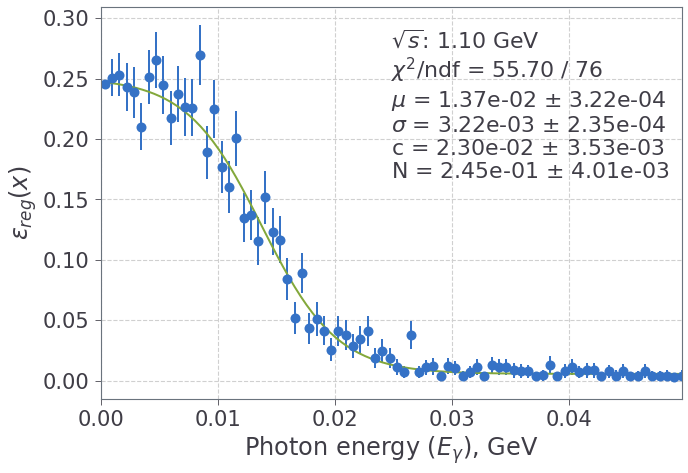

In [116]:
p['19'].show_histo_by_name('550_70260')
plt.savefig('../Journal/outputs/images/allan_effreg_537_v6.pdf')

In [69]:
e11, eff11, err11 = p['11'].get_efficiency()
e12, eff12, err12 = p['12'].get_efficiency()
e17, eff17, err17 = p['17'].get_efficiency()
e19, eff19, err19 = p['19'].get_efficiency()

In [93]:
print( e11[0], eff11[0] )
print( e17[0], eff17[0] )

2.0 0.05373904476115206
2.007 0.23806684867494188


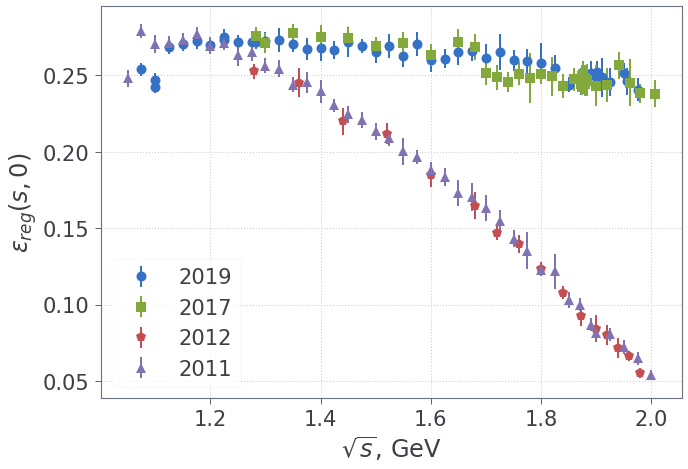

In [84]:
plt.errorbar(e19, eff19, yerr=err19, fmt='o', label='2019', ms=10, lw=2)
plt.errorbar(e17, eff17, yerr=err17, fmt='s', label='2017', ms=10, lw=2)
plt.errorbar(e12, eff12, yerr=err12, fmt='p', label='2012', ms=10, lw=2)
plt.errorbar(e11, eff11, yerr=err11, fmt='^', label='2011', ms=10, lw=2)
plt.legend(frameon=True)
my_style('', '$\sqrt{s}$, GeV', '$\\varepsilon_{reg}(s,0)$')
# plt.savefig('../Journal/outputs/images/e0.pdf')

### Количество событий

In [127]:
pd.read_csv('./data/fit_frame_11_2205.csv')[['Ns', 'Nb']].sum() + \
pd.read_csv('./data/fit_frame_12_2205.csv')[['Ns', 'Nb']].sum() + \
pd.read_csv('./data/fit_frame_17_2205.csv')[['Ns', 'Nb']].sum() + \
pd.read_csv('./data/fit_frame_19_2205.csv')[['Ns', 'Nb']].sum()

Ns    17955.239552
Nb      501.125974
dtype: float64

In [469]:
g = glob('/spoolA/petrov/research/outputs/19/trees/*.root')

In [477]:
for d in g:
    if (b'len_ks' not in uproot.open(d)['t'].allkeys() ):
        print(d)

In [485]:
year = 19
branches = ['beam_energy', 'theta_ks', 'mass', 'label']
if year==19:
    branches.append('len_ks')
f = uproot.pandas.iterate(f'/spoolA/petrov/research/outputs/{year}/trees/*.root', "t", \
                          reportpath = True, branches=branches)
dataRAW = pd.concat([j.assign(name=(re.findall(r"/([^/]*.root)", path)[0])) for path,j in f]).query('abs(mass-500)<50')

In [486]:
fmc = uproot.pandas.iterate(f'/spoolA/petrov/research/outputs/mc{year}/trees/*.root', "t", \
                          reportpath = True, branches=branches)
dataRAWmc = pd.concat([j.assign(name=(re.findall(r"/([^/]*.root)", path)[0])) for path,j in fmc]).query('abs(mass-500)<50')
lum = pd.read_csv(f'../../inputs/{year}/lum.dat').rename({'filename':'name'}, axis=1)
# lum = pd.read_csv(f'./data/fit_frame_{year}_2205.csv')[['Ns', 'mcname']].rename({'mcname':'name', 'Ns':'lum'}, axis=1)

In [488]:
lum2 = dataRAW.groupby('name').agg({'mass':'count'}).reset_index().merge(lum, on='name')[['mass','mcname']].\
rename({'mass':'lum', 'mcname':'name'},axis=1)

In [489]:
dataRAWmc = dataRAWmc.merge(lum2, on='name')

In [490]:
dataRAWmc.head()

,beam_energy,theta_ks,mass,label,len_ks,name,lum
0,537.5,1.217140,498.242828,537.5,3.946786,tr_ph_kskl_537.5_70914.root,1933
1,537.5,2.549122,502.523682,537.5,1.088823,tr_ph_kskl_537.5_70914.root,1933
2,537.5,2.032222,496.953979,537.5,0.287766,tr_ph_kskl_537.5_70914.root,1933
3,537.5,1.184597,496.486786,537.5,1.990326,tr_ph_kskl_537.5_70914.root,1933
4,537.5,2.349648,496.779816,537.5,1.164116,tr_ph_kskl_537.5_70914.root,1933


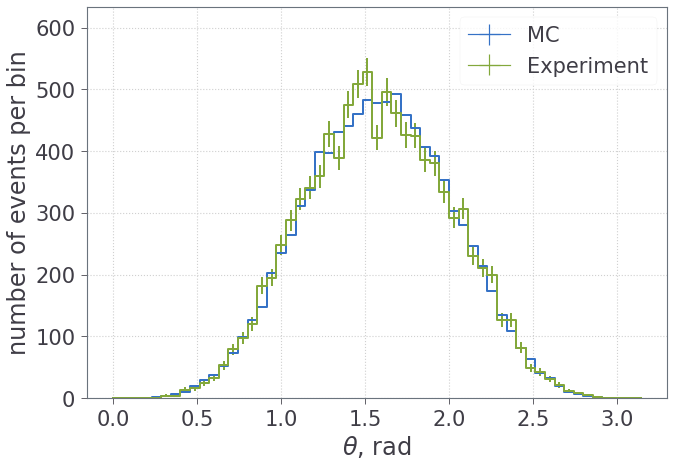

In [511]:
nb = 55
h, bins = np.histogram(dataRAWmc.theta_ks, bins = nb, weights=dataRAWmc.lum, range=(0, np.pi))
h = h.astype(np.float)
he, bins = np.histogram(dataRAW.theta_ks, bins = nb, range=(0, np.pi))
h *= he.sum()/h.sum()
hep.histplot([h, he], bins, density=False, yerr=[0*h, np.sqrt(he)], label=['MC', 'Experiment'], lw=2)
plt.legend()
my_style('','$\\theta$, rad', 'number of events per bin')
# plt.savefig('../Journal/outputs/images/theta_dist.pdf')

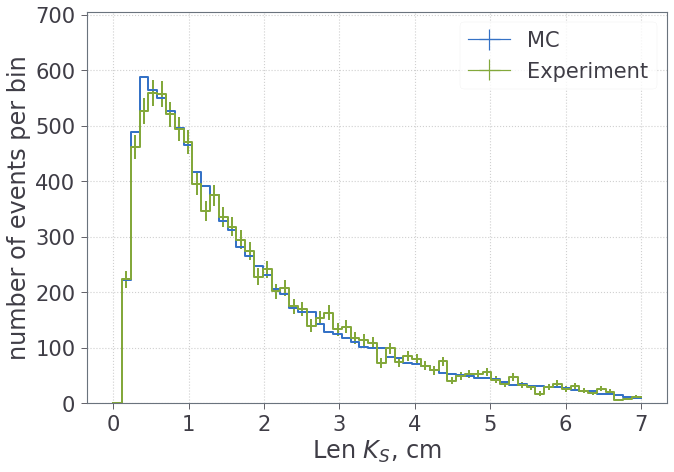

In [510]:
nb = 60
h, bins = np.histogram(dataRAWmc.len_ks, bins = nb, weights=dataRAWmc.lum, range=(0, 7))
h = h.astype(np.float)
he, bins = np.histogram(dataRAW.len_ks, bins = nb, range=(0, 7))
h *= he.sum()/h.sum()
hep.histplot([h, he], bins, density=False, yerr=[0*h, np.sqrt(he)], label=['MC', 'Experiment'], lw=2)
plt.legend()
my_style('','Len $K_S$, cm', 'number of events per bin')
# plt.savefig('../Journal/outputs/images/ks_dist.pdf')

In [499]:
yy = (he - h)[he>0]
xx = he[he>0]
np.sum(yy**2/xx )

111.15642673271405

<ErrorbarContainer object of 3 artists>

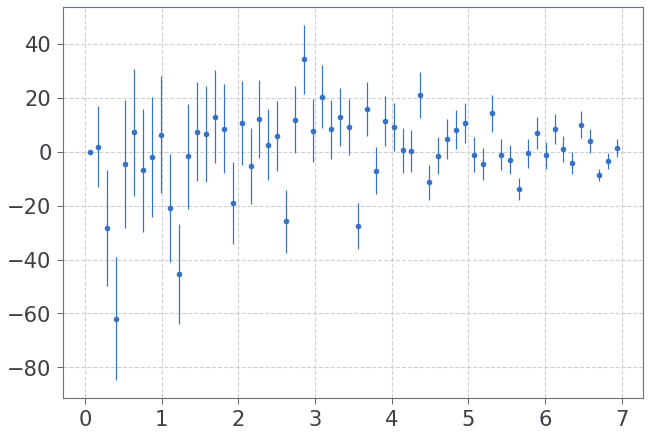

In [500]:
plt.errorbar( x = ( bins[1:] + bins[:-1] )/2, y = he - h , yerr=np.sqrt(he), fmt='o' )